In [ ]:
!pip install kaggle scikit-learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                   title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                    Vehicle Sales Data                       19MB  2024-02-21 20:16:17           8128        142  1.0              
zain280/car-dataset                                   Car Dataset                               1MB  2024-03-02 15:14:49           1733         27  1.0              
tarunrm09/climate-change-indicators                   Climate change Indicators                34KB  2024-02-22 08:53:54           4122         96  1.0              
mahad049/job-placement-dataset                        Job placement dataset                     6KB  2024-03-03 08:18:12           1137         26  0.9411765        
yami

In [ ]:
!kaggle datasets download -d prachi13/employeeattritionrate

  0% 0.00/18.2k [00:00<?, ?B/s]
100% 18.2k/18.2k [00:00<00:00, 34.0MB/s]


In [ ]:
!unzip employeeattritionrate.zip

Archive:  employeeattritionrate.zip
  inflating: Attrition Data.csv      


In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('Attrition Data.csv')

In [ ]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
df.shape

(1470, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [ ]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

<Axes: xlabel='EducationField'>

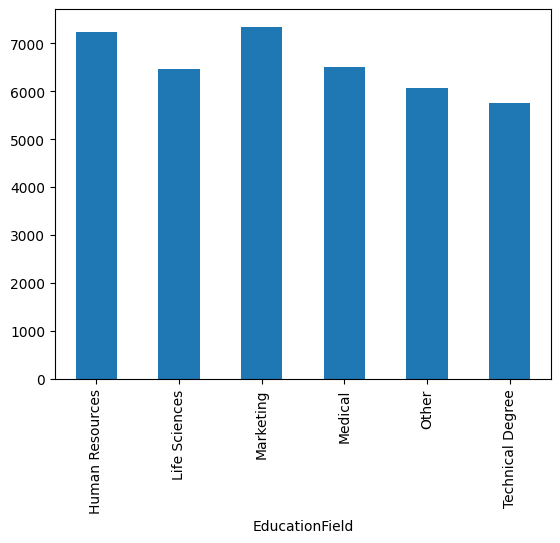

In [ ]:
df.groupby('EducationField')['MonthlyIncome'].mean().plot(kind='bar')

<ipython-input-95-626d9519b841>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EducationField', y='MonthlyIncome', palette='crest')


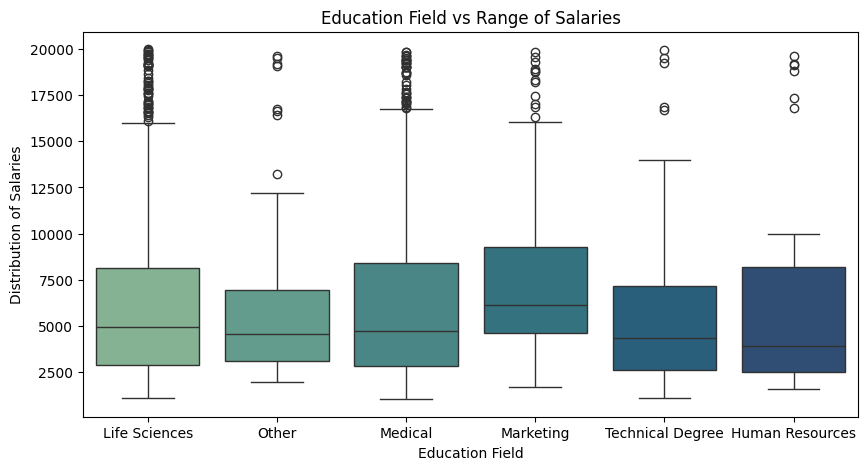

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='EducationField', y='MonthlyIncome', palette='crest')
plt.title('Education Field vs Range of Salaries')
plt.xlabel('Education Field')
plt.ylabel('Distribution of Salaries')
plt.show()

<ipython-input-96-019423860315>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education', y='MonthlyIncome', palette='crest')


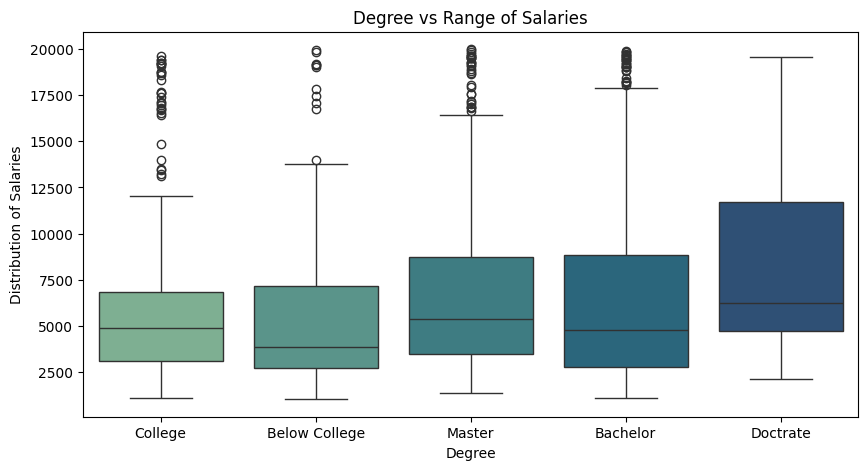

In [ ]:
df_new = df['Education'].replace(1, 'Below College', inplace=True)
df_new = df['Education'].replace(2, 'College', inplace=True)
df_new = df['Education'].replace(3, 'Bachelor', inplace=True)
df_new = df['Education'].replace(4, 'Master', inplace=True)
df_new = df['Education'].replace(5, 'Doctrate', inplace=True)
# df.head()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Education', y='MonthlyIncome', palette='crest')
plt.title('Degree vs Range of Salaries')
plt.xlabel('Degree')
plt.ylabel('Distribution of Salaries')
plt.show()

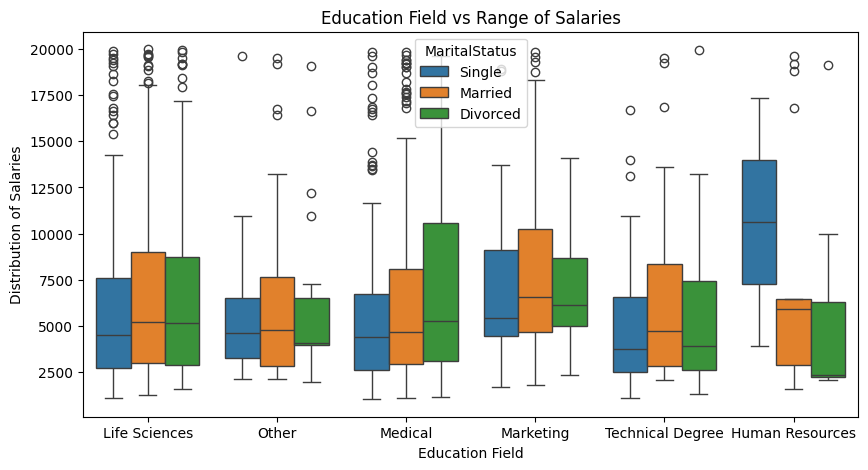

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='EducationField', y='MonthlyIncome', hue='MaritalStatus')
plt.title('Education Field vs Range of Salaries')
plt.xlabel('Education Field')
plt.ylabel('Distribution of Salaries')
plt.show()

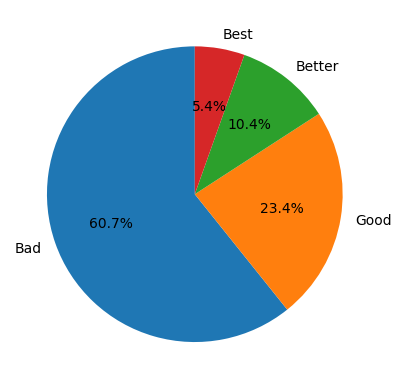

In [ ]:
plt.pie(df['WorkLifeBalance'].value_counts(), autopct='%1.1f%%', labels=['Bad', 'Good', 'Better', 'Best'], startangle=90)
plt.show()

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

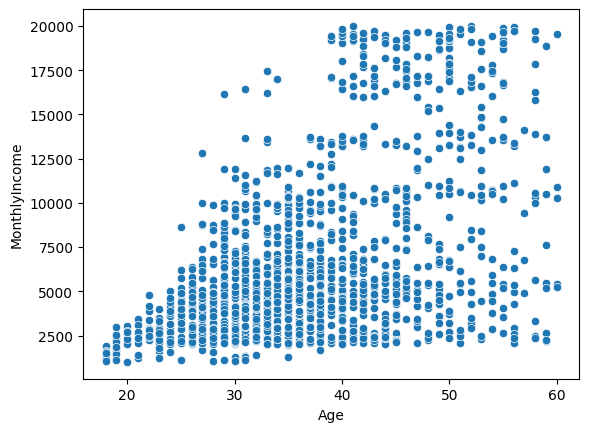

In [ ]:
sns.scatterplot(x='Age', y='MonthlyIncome', data=df)

Text(0.5, 1.0, 'Average years at company of employes vs Attrition')

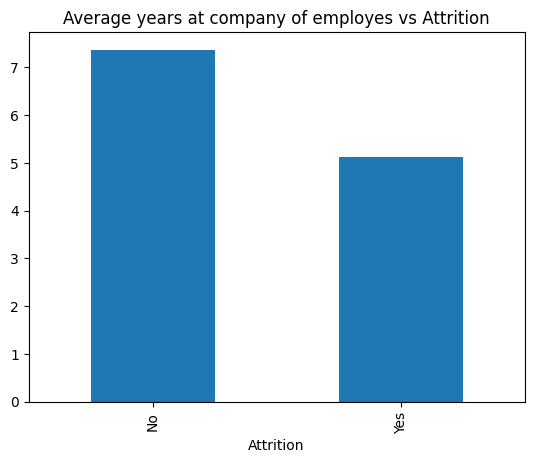

In [ ]:
df.groupby('Attrition')['YearsAtCompany'].mean().plot(kind='bar')
plt.title('Average years at company of employes vs Attrition')

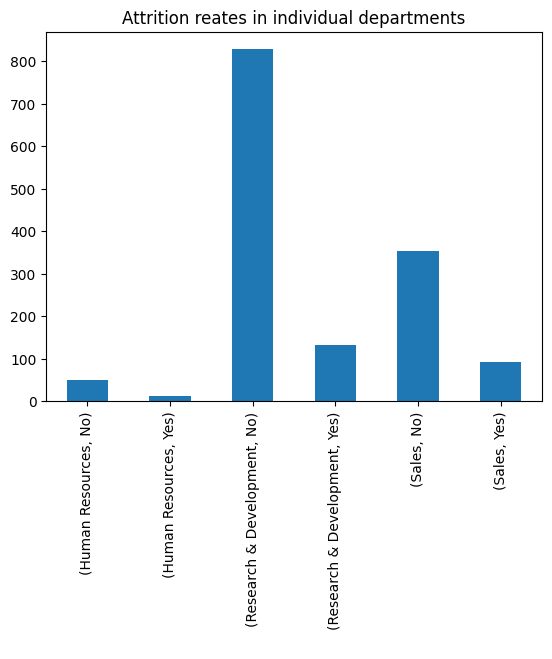

In [ ]:
df.groupby('Department')['Attrition'].value_counts().plot(kind='bar')
plt.title('Attrition reates in individual departments')
plt.xlabel(' ')
plt.show()

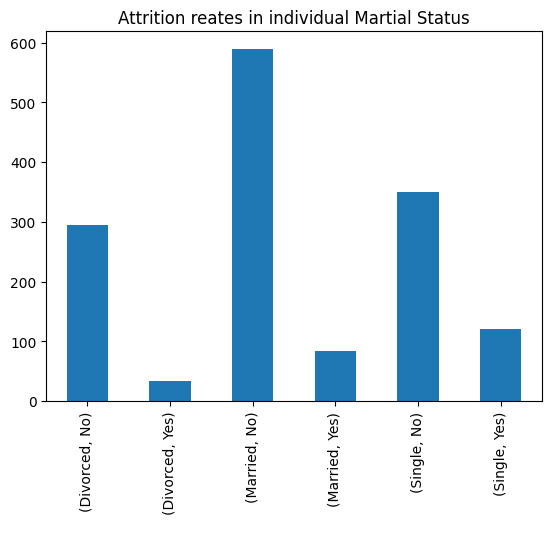

In [ ]:
df.groupby('MaritalStatus')['Attrition'].value_counts().plot(kind='bar')
plt.title('Attrition reates in individual Martial Status')
plt.xlabel(' ')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   object
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 149.4+ KB


In [ ]:
encoder = LabelEncoder()
attrition_encoder = encoder.fit(df['Attrition'])
df['Attrition'] = attrition_encoder.transform(df['Attrition'])
attrition_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
dep_encoder = encoder.fit(df['Department'])
df['Department'] = dep_encoder.transform(df['Department'])
dep_encoder.classes_

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [ ]:
edu_encoder = encoder.fit(df['Education'])
df['Education'] = edu_encoder.transform(df['Education'])
edu_encoder.classes_

array(['Bachelor', 'Below College', 'College', 'Doctrate', 'Master'],
      dtype=object)

In [ ]:
eduf_encoder = encoder.fit(df['EducationField'])
df['EducationField'] = eduf_encoder.transform(df['EducationField'])
eduf_encoder.classes_

array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [ ]:
ms_encoder = encoder.fit(df['MaritalStatus'])
df['MaritalStatus'] = ms_encoder.transform(df['MaritalStatus'])
ms_encoder.classes_

array(['Divorced', 'Married', 'Single'], dtype=object)

In [ ]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2


<Axes: >

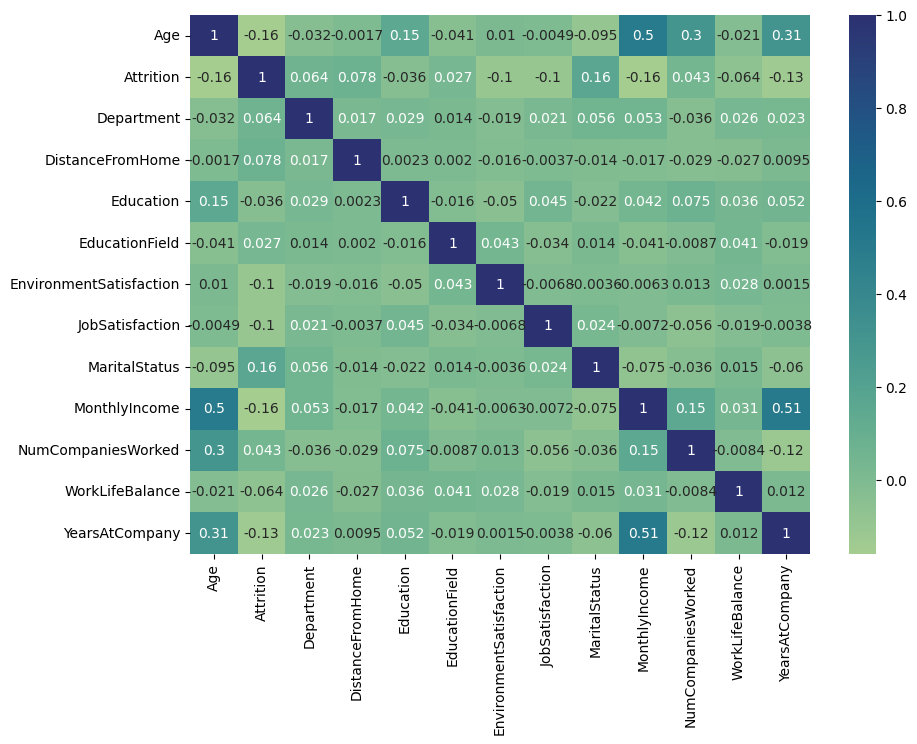

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), cmap='crest', annot=True)

In [ ]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#model1 -> LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
acc1 = accuracy_score(y_test, y_pred)
acc1

0.8662131519274376

In [ ]:
prec1 = precision_score(y_test, y_pred)
prec1

0.6

<Axes: >

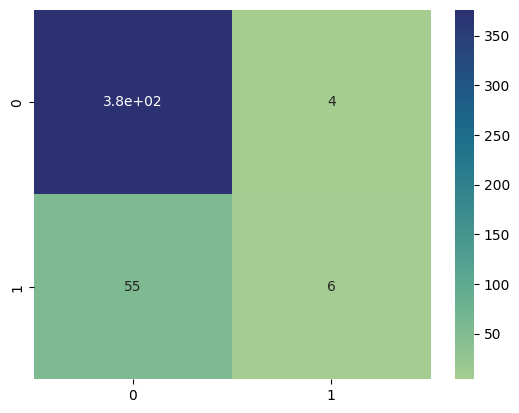

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='crest', annot=True)

In [ ]:
#model2 -> SGDClassifier
model2 = SGDClassifier()
model2.fit(x_train, y_train)

SGDClassifier()

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
acc2 = accuracy_score(y_test, y_pred)
acc2

0.8616780045351474

In [ ]:
prec2 = precision_score(y_test, y_pred)
prec2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

<Axes: >

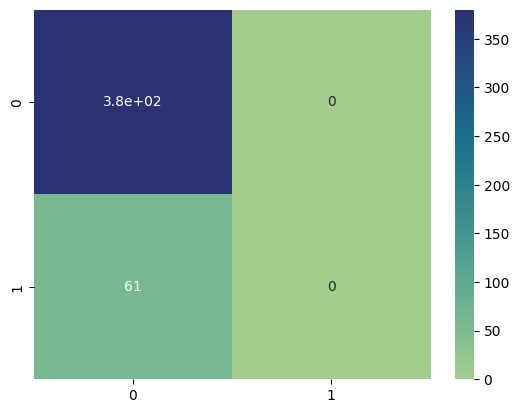

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='crest', annot=True)

In [ ]:
#model3 -> KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model3.predict(x_test)

In [ ]:
acc3 = accuracy_score(y_test, y_pred)
acc3

0.8299319727891157

In [ ]:
prec3 = precision_score(y_test, y_pred)
prec3

0.15

<Axes: >

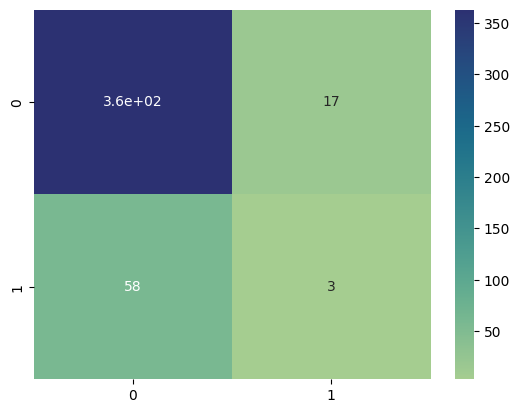

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='crest', annot=True)

In [ ]:
results = {
    'Logistic Regressor' : [acc1, prec1],
    'SGD Classifier' : [acc2, prec2],
    'KNN Classifier' : [acc3, prec3]
}
results_df = pd.DataFrame(results, columns=list(results.keys()), index=['Accuracy', 'Precision'])
results_df

,Logistic Regressor,SGD Classifier,KNN Classifier
Accuracy,0.866213,0.861678,0.829932
Precision,0.600000,0.000000,0.150000


<Axes: >

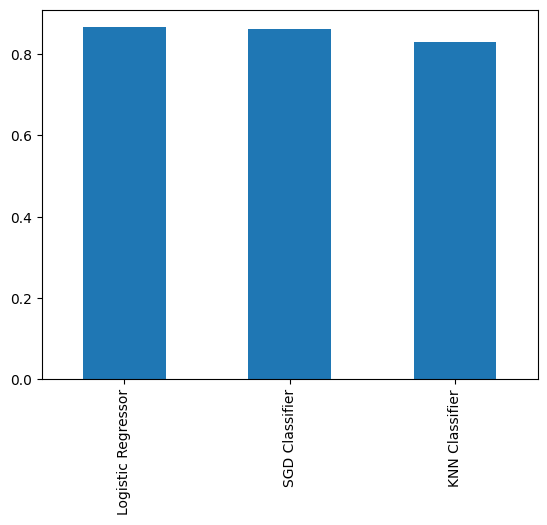

In [ ]:
results_df.iloc[0].plot(kind='bar')

<Axes: >

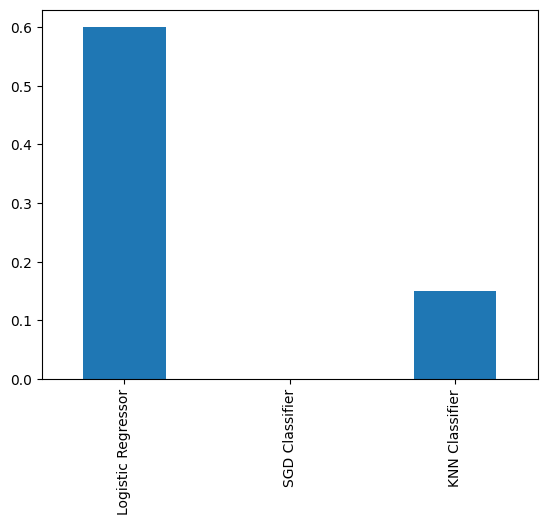

In [ ]:
results_df.iloc[1].plot(kind='bar')

In [ ]:
import joblib
joblib.dump(model1, 'Attrition_Model.pkl')

['Attrition_Model.pkl']

In [ ]:
model1.predict([[41,2,	1,	2,	1,	2,	4,	2,	5993,	8,	1,	6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])